In [11]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import numpy as np
from textblob import TextBlob
import twitter_credentials

import tkinter
from tkinter import *
from time import sleep
from datetime import datetime
import matplotlib.pyplot as plt

In [7]:
auth = OAuthHandler(twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET)
auth.set_access_token(twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET)

In [19]:
class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """

    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1

    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df


In [55]:
api = tweepy.API(auth)

tweets = api.search('Tesla Model S', count=200)

if __name__ == '__main__':
    tweet_analyzer = TweetAnalyzer()
    df = tweet_analyzer.tweets_to_data_frame(tweets)
    df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])
    df1 = df [['tweets','id','len','likes','retweets','sentiment']]
    display(df1.head(10))


,tweets,id,len,likes,retweets,sentiment
0,@ElectricJen 3D Maxpider. That’s all you need ...,1159599536232443904,139,0,0,0
1,"Tesla Offers Free, Unlimited Supercharger Use ...",1159598805865701387,101,0,0,1
2,Ya puedes disfrutar de un Tesla Model S conver...,1159596309873143811,120,0,1,0
3,RT @ANCAPsafety: 5 star ANCAP safety rating ha...,1159596254848049153,140,0,843,-1
4,@Trumpery45 @scot_work @elonmusk @Tesla I have...,1159594867770757120,140,0,0,1
5,RT @skorusARK: 1/ In Q2 2019 Tesla reported an...,1159592930476208128,140,0,18,0
6,RT @futurism: Do Tesla's cars have a suspensio...,1159591288553050112,80,0,19,0
7,RT @teslafi: Software version 2019.28.2.5 f5ae...,1159591115206451200,140,0,2,0
8,RT @futurism: Do Tesla's cars have a suspensio...,1159590590297903105,80,0,19,0
9,Watching Tesla model S and X reviews on YouTub...,1159590427458252802,79,1,0,0


In [57]:

df.describe()


,id,len,likes,retweets,sentiment
count,1.000000e+02,100.000000,100.000000,100.00000,100.000000
mean,1.159570e+18,124.700000,1.410000,15.02000,0.230000
std,1.401769e+13,25.802474,8.357051,84.17022,0.565953
min,1.159549e+18,22.000000,0.000000,0.00000,-1.000000
25%,1.159557e+18,120.000000,0.000000,0.00000,0.000000
50%,1.159569e+18,140.000000,0.000000,1.00000,0.000000
75%,1.159583e+18,140.000000,0.000000,18.00000,1.000000
max,1.159600e+18,143.000000,82.000000,843.00000,1.000000


In [58]:
negative_sentiment = sum(df1.sentiment<0)
positive_sentiment = sum(df1.sentiment>0)
neutral_sentiment = sum(df1.sentiment==0)
#sum(df1.sentiment)

print("Negative:",negative_sentiment)
print("Positive:",positive_sentiment)
print("Neutral:",neutral_sentiment)

Negative: 7
Positive: 30
Neutral: 63


### After Mid Term

In [52]:
api = tweepy.API(auth,wait_on_rate_limit=True)

tweets = api.search('Nissan Leaf', count=200)

if __name__ == '__main__':
    tweet_analyzer = TweetAnalyzer()
    df = tweet_analyzer.tweets_to_data_frame(tweets)
    df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']])
    df1 = df [['tweets','id','len','likes','retweets','sentiment']]
    display(df1.head(10))

,tweets,id,len,likes,retweets,sentiment
0,Visit Nissan Of Clinton for hot summer deals o...,1159596445495939077,139,0,0,1
1,RT @NissanEV_UK: How easy is it to charge a Ni...,1159596057799663616,94,0,5,1
2,RT @sydney_ev: A nice little surprise in the b...,1159594171511918592,140,0,2,1
3,"Hey @GM &amp; @Toyota, why so quiet on the #Cl...",1159588936353636353,144,1,0,-1
4,@elonmusk @Tesla And what about duty import ta...,1159582176352067587,138,0,0,1
5,Nissan entrega la primera unidad de Leaf en l...,1159577483806740480,121,0,0,0
6,"Nissan is offering a $3,500 rebate to all LG&a...",1159577476802240513,144,1,0,1
7,@ClarkDennisM I recently saw a Nissan LEAF bei...,1159576263394091008,140,2,0,1
8,Car shopping? \n@publicpowerorg &amp; Nissan a...,1159574805869256704,144,2,0,1
9,@CelovskyDanny @liberal_party Why can Norway d...,1159566944032436227,140,0,0,-1


In [53]:
df1.describe()

,id,len,likes,retweets,sentiment
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000
mean,1.159483e+18,110.690000,1.770000,8.160000,0.250000
std,5.880936e+13,36.018428,8.770768,45.184855,0.575159
min,1.159382e+18,28.000000,0.000000,0.000000,-1.000000
25%,1.159438e+18,76.000000,0.000000,0.000000,0.000000
50%,1.159481e+18,138.000000,0.000000,0.000000,0.000000
75%,1.159527e+18,140.000000,1.000000,2.000000,1.000000
max,1.159596e+18,144.000000,82.000000,322.000000,1.000000


In [54]:
negative_sentiment = sum(df1.sentiment<0)
positive_sentiment = sum(df1.sentiment>0)
neutral_sentiment = sum(df1.sentiment==0)
#sum(df1.sentiment)

print("Negative:",negative_sentiment)
print("Positive:",positive_sentiment)
print("Neutral:",neutral_sentiment)

Negative: 7
Positive: 32
Neutral: 61


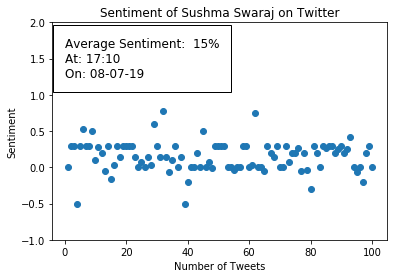

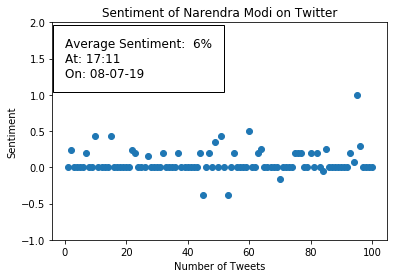

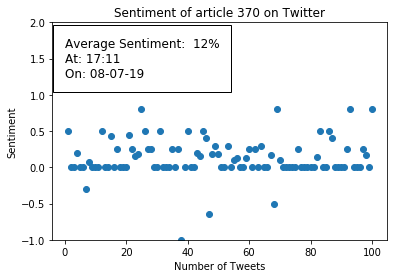

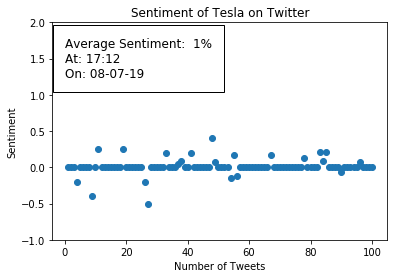

Exception in Tkinter callback
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-18-60dfd1d78574>", line 51, in getData
    averagePolarity = (sum(polarity_list))/(len(polarity_list))
ZeroDivisionError: division by zero


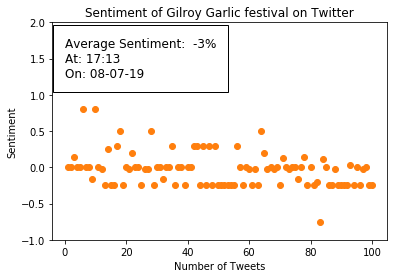

In [18]:
#GUI
api = tweepy.API(auth,wait_on_rate_limit=True)
root = Tk()

label1 = Label(root, text="Search")
E1 = Entry(root, bd =5)

label2 = Label(root, text="Sample Size")
E2 = Entry(root, bd =5)

def getE1():
    return E1.get()

def getE2():
    return E2.get()

def getData():
    getE1()
    keyword = getE1()

    getE2()
    numberOfTweets = getE2()
    numberOfTweets = int(numberOfTweets)

    #Where the tweets are stored to be plotted
    polarity_list = []
    numbers_list = []
    number = 1

    for tweet in tweepy.Cursor(api.search, keyword, lang="en").items(numberOfTweets):
        try:
            analysis = TextBlob(tweet.text)
            analysis = analysis.sentiment
            polarity = analysis.polarity
            polarity_list.append(polarity)
            numbers_list.append(number)
            number = number + 1

        except tweepy.TweepError as e:
            print(e.reason)

        except StopIteration:
            break

    #Plotting
    axes = plt.gca()
    axes.set_ylim([-1, 2])

    plt.scatter(numbers_list, polarity_list)

    averagePolarity = (sum(polarity_list))/(len(polarity_list))
    averagePolarity = "{0:.0f}%".format(averagePolarity * 100)
    time  = datetime.now().strftime("At: %H:%M\nOn: %m-%d-%y")

    plt.text(0, 1.25, "Average Sentiment:  " + str(averagePolarity) + "\n" + time, fontsize=12, bbox = dict(facecolor='none', edgecolor='black', boxstyle='square, pad = 1'))

    plt.title("Sentiment for " + keyword + " on Twitter")
    plt.xlabel("Number of Tweets")
    plt.ylabel("Sentiment")
    plt.show()

submit = Button(root, text ="Submit", command = getData)

label1.pack()
E1.pack()
label2.pack()
E2.pack()
submit.pack(side =BOTTOM)

root.mainloop()

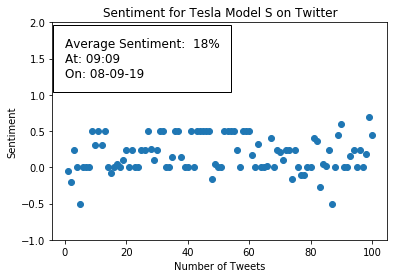

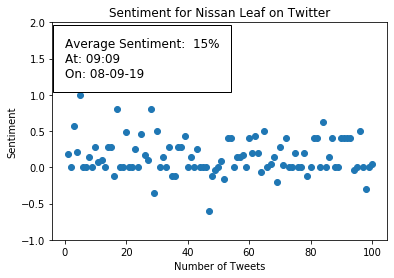

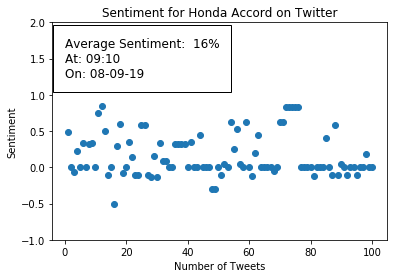

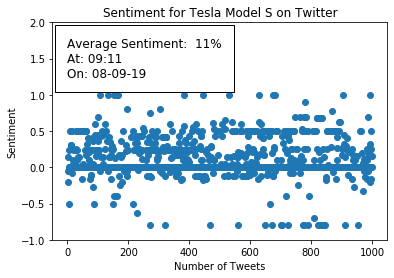

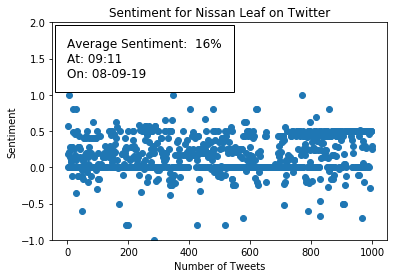

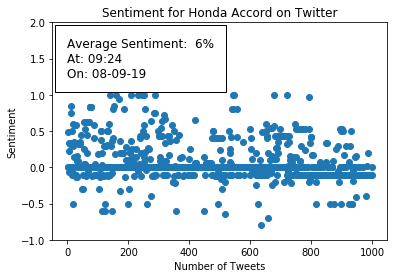

In [59]:
#GUI
api = tweepy.API(auth,wait_on_rate_limit=True)
root = Tk()

label1 = Label(root, text="Search Twitter For")
entry1 = Entry(root, bd =5)

label2 = Label(root, text="Number Of Tweets")
entry2 = Entry(root, bd =5)

def getEntry1():
    return entry1.get()

def getEntry2():
    return entry2.get()

def getData():
    getEntry1()
    keyword = getEntry1()

    getEntry2()
    numberOfTweets = getEntry2()
    numberOfTweets = int(numberOfTweets)

    #Where the tweets are stored to be plotted
    polarity_list = []
    numbers_list = []
    number = 1

    for tweet in tweepy.Cursor(api.search, keyword, lang="en").items(numberOfTweets):
        try:
            analysis = TextBlob(tweet.text)
            analysis = analysis.sentiment
            polarity = analysis.polarity
            polarity_list.append(polarity)
            numbers_list.append(number)
            number = number + 1

        except tweepy.TweepError as e:
            print(e.reason)

        except StopIteration:
            break

    #Plotting
    axes = plt.gca()
    axes.set_ylim([-1, 2])

    plt.scatter(numbers_list, polarity_list)

    averagePolarity = (sum(polarity_list))/(len(polarity_list))
    averagePolarity = "{0:.0f}%".format(averagePolarity * 100)
    time  = datetime.now().strftime("At: %H:%M\nOn: %m-%d-%y")

    plt.text(0, 1.25, "Average Sentiment:  " + str(averagePolarity) + "\n" + time, fontsize=12, bbox = dict(facecolor='none', edgecolor='black', boxstyle='square, pad = 1'))

    plt.title("Sentiment for " + keyword + " on Twitter")
    plt.xlabel("Number of Tweets")
    plt.ylabel("Sentiment")
    plt.show()

submit = Button(root, text ="Submit", command = getData)

label1.pack()
entry1.pack()
label2.pack()
entry2.pack()
submit.pack(side = BOTTOM)

root.mainloop()